# SP22: Machine Learning for Signal Processing - Assignment 1

## Name : Akhila Sakiramolla (asakiram@iu.edu)
## UID : 2000886005

## Importing required libraries

In [230]:
import scipy.io
import numpy as np
import math 
from numpy import linalg as LA
import matplotlib.pyplot as plt
from numpy.random import normal
import matplotlib.image as mpimg
# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## P1: MLE for uniform distribution

The given scores are : [92, 95.8, 91.3, 94.1, 90.9]

The probability density function is given by :

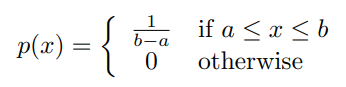

The joint likelihood for the 5 variables is given by :

$p = \prod_{i = 1}^{5}\: p(x)$

$p = \prod_{i = 1}^{5}\: \frac{1}{b - a}$

$p = (\frac{1}{b - a})^{5}$

In order to get the parameters that maximize the likelihood :

$a, b = arg\: max_{a,b} (\frac{1}{b - a})^{5}$

Applying log :

$a, b = arg\: max_{a,b}\;  ln \; (\frac{1}{b - a})^{5}$

To get the maximum values of a, b we need to find the partial derivatives of the equation wrt a, b and set it to zero.

$\frac{\partial  ln \; (\frac{1}{b - a})^{5}}{\partial a} = \frac{5}{b-a}$

This function is monotonically increaing as b > a and the value will always be greater than 0. So, a must be the minimum value of all the variables. So, a = 90.9

$\frac{\partial  ln \; (\frac{1}{b - a})^{5}}{\partial b} = - \frac{5}{b-a}$

This function is monotonically decreasing as b > a and the value will always be less than 0. So, b must be the maximum value of all the variables. So, b = 95.8

a, b = (90.9, 95.8) and the range is [90.9, 95.8]

But it is mentioned that the bounds are multiples of 5 and not real-valued. The range we have is [90.9, 95.8] which does not satisfy this. 

So the new lower bound can be 90 and the upper bound can be 95. But the upper bound cannot hold the value 95.8 and the values after that. Also, since the grade is A+ there cannot be another grade for those remainig values. Therefore, the new upper bound has to be 100.

The new range for A+ grade = [90, 100]

## P2: Central Limit Theorem

In [209]:
# Loading image data and extracting red channel

img=mpimg.imread('luddy.jpg')
img_red = img[...,0]
print("Red channel shape :",img_red.shape)
print("Red channel :",img_red)

Red channel shape : (3655, 6496)
Red channel : [[174 174 174 ...  60  60  60]
 [173 173 173 ...  61  60  60]
 [173 173 173 ...  61  61  60]
 ...
 [ 35  34  32 ...  20  21  21]
 [ 36  36  34 ...  28  29  30]
 [ 36  36  34 ...  27  29  31]]


### 2 patches

In [210]:
# Taking two patches of size 100x100 from two random locations in the image

patch2_1 = np.random.choice(img_red.ravel(),(100,100),replace=False)
print("Patch 1 :",patch2_1)
patch2_2 = np.random.choice(img_red.ravel(),(100,100),replace=False)
print("Patch 2 :",patch2_2)

Patch 1 : [[175 184 179 ... 207  27 167]
 [ 86 197 235 ... 125  93 247]
 [137  56 185 ... 178  70 200]
 ...
 [158  41 132 ... 183 173 175]
 [100 142  68 ... 222 213  68]
 [ 64 200 193 ... 219 130 195]]
Patch 2 : [[223 211 210 ... 216  82 109]
 [171 127 111 ...  33 185 162]
 [231 125 145 ... 239 132 205]
 ...
 [ 49 252 201 ...  51 118 151]
 [220  89 155 ... 171  79 251]
 [195  87 220 ...  81 141 122]]


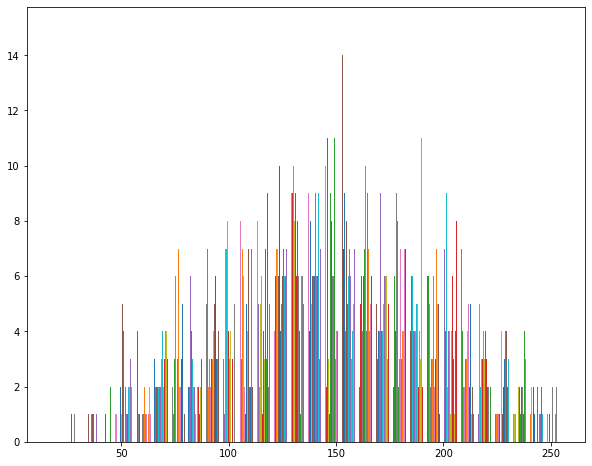

In [174]:
# Getting average of the two patches
patch2_avg = np.mean(np.array([patch2_1, patch2_2]), axis=0 )

# Plotting histogram of the average patch
plt.figure(figsize=(10, 8))
plt.hist(patch2_avg, bins = 30)
plt.show()

The above distribution of average patch from 2 patches is not exactly a gaussian distribution but seems like it.

### 100 patches

In [ ]:
# Taking 100 patches of size 100x100 from random locations in the image

# Intialising a random array of 100x100 to add 99 random arrays to create 100 samples and take average sample
patch100_arr = np.int64(np.random.choice(img_red.ravel(),(100,100),replace=False))

# Adding the rest of the samples
counter = 1
while counter < 100:
  patch_100 = np.int64(np.random.choice(img_red.ravel(),(100,100),replace=False))
  patch100_arr += patch_100
  counter += 1

# Getting average of the 100 samples
patch100_avg = np.around(patch100_arr/100, decimals = 2)

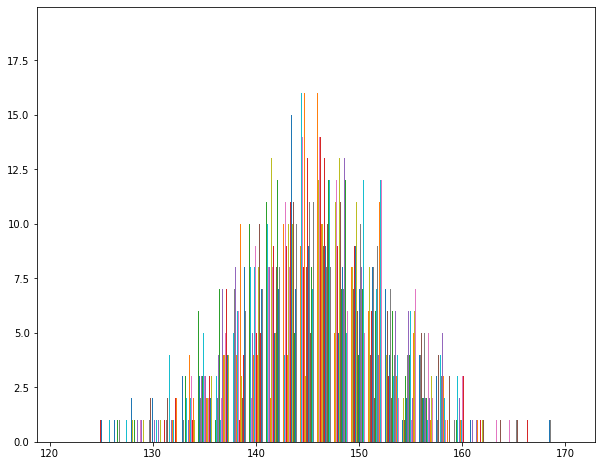

In [61]:
# Plotting histogram of the average patch

plt.figure(figsize=(10, 8))
plt.hist(patch100_avg, bins = 30)
plt.show()

The above distribution of average patch from 100 patches is not exactly a gaussian distribution but it seems more normal than the average patch of 2 patches.

### 1000 patches

In [63]:
# Taking 100 patches of size 100x100 from random locations in the image

# Intialising a random array of 100x100 to add 999 random arrays to create 1000 samples and take average sample
patch1000_arr = np.int64(np.random.choice(img_red.ravel(),(100,100),replace=False))

# Adding the rest of the samples
counter = 1
while counter < 1000:
  patch_1000 = np.int64(np.random.choice(img_red.ravel(),(100,100),replace=False))
  patch1000_arr += patch_1000
  counter += 1

# Getting average of the 1000 samples
patch1000_avg = np.around(patch1000_arr/1000, decimals = 2)

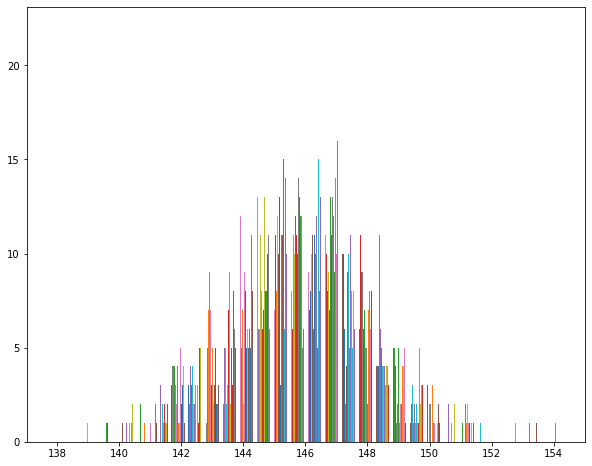

In [64]:
# Plotting histogram of the average patch

plt.figure(figsize=(10, 8))
plt.hist(patch1000_avg, bins = 30)
plt.show()

The above distribution of average patch from 1000 patches seems to be a normal distrubution but is definitely more normal than average patches from 2 and 100 patches.

### Distribution comparison

Text(0.5, 1.0, 'Distribution for 1000 patches')

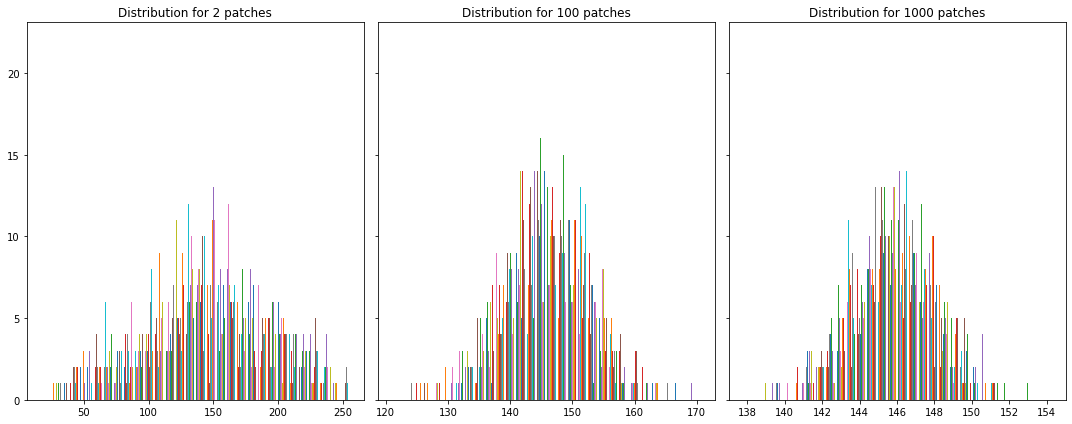

In [200]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(15,6))

axs[0].hist(patch2_avg, bins = 30)
axs[0].set_title('Distribution for 2 patches')
axs[1].hist(patch100_avg, bins = 30)
axs[1].set_title('Distribution for 100 patches')
axs[2].hist(patch1000_avg, bins = 30)
axs[2].set_title('Distribution for 1000 patches')

On comparing the three distributions, I observe that the distribution with the highest number of patches is the most normally distributed compared to other samples.

### Log-likelihood calculation

Before calculating the log likelihood for each distribution, I will first calculate the maximum likelihood estimation parameters from the ditributions, which is nothing but the sample mean and sample variance.

We get sample mean by :

$\mu = \frac{1}{N}\, \sum_{i = 1}^{N}\, x_{i}$

We get sample variance by :


$\sigma = \sqrt{\frac{1}{N}\, \sum_{i = 1}^{N}\, (x_{i} - \mu )^{2}}$

In [211]:
# Calculating sample mean and variance of average of 2 patches

patch2_mu = round(np.mean(patch2_avg),2)
patch2_sigma = round(np.std(patch2_avg),2)

In [212]:
# Calculating sample mean and variance of average of 100 patches

patch100_mu = round(np.mean(patch100_avg),2)
patch100_sigma = round(np.std(patch100_avg),2)

In [213]:
# Calculating sample mean and variance of average of 1000 patches

patch1000_mu = round(np.mean(patch1000_avg),2)
patch1000_sigma = round(np.std(patch1000_avg),2)

The probability density function of a gaussian distribution is given by :

$p(x_{1}\, |\, \mu,\, \sigma) = \frac{1}{\sqrt{2\pi}\sigma }\; exp\left \{ - \frac{(x - \mu)^{2}}{2\sigma^{2}} \right \}$

Joint likelihood is given by :

$p = \prod_{i = 1}^{N}\: p\left ( x_{i}\: |\:  \mu, \sigma \right )$

By applying log :

$ln(p) = ln \left \{ \prod_{i = 1}^{N}\: p\left ( x_{i}\: |\:  \mu, \sigma \right ) \right \} = \sum_{i=1}^{N}\; ln\;  p(x_{i}\; | \; \mu, \sigma)$

Solving this equation further to get :

$ln (p) =  \sum_{i=1}^{N}\: ln\: \frac{1}{\sqrt{2\pi}\sigma }\; exp\left \{ - \frac{(x - \mu)^{2}}{2\sigma^{2}} \right \}$

$  = \sum_{i=1}^{N}\: ln(1) - ln(\sqrt{2\pi}) - ln(\sigma) - \frac{(x_{i} - \mu)^{2}}{2\sigma^{2}}$

$  = -\; N\: ln(\sqrt{2\pi}) - N\: ln(\sigma) - \sum_{i=1}^{N}\:\frac{(x_{i} - \mu)^{2}}{2\sigma^{2}}$



Therefore the log likelihood can be computed by :

log likelihood = $-\; N\: ln(\sqrt{2\pi}) - N\: ln(\sigma) - \sum_{i=1}^{N}\:\frac{(x_{i} - \mu)^{2}}{2\sigma^{2}}$

In [220]:
# Function to compute log likelihood

def logLikelihood(patch, N, mu, sigma):
  summation = 0
  term1 = -N*np.log(math.sqrt(math.pi*2))
  term2 = -N*np.log(sigma)
  for i in patch:
    for j in i:
      summation += ((j - mu)**2)/(2*(sigma**2))
  log_likelihood = term1 + term2 - summation
  return log_likelihood

In [221]:
N = 10000

In [205]:
# Calculating likelihood for average patch of 2 patches

patch2_log_likelihood = round(logLikelihood(patch2_avg, N, patch2_mu, patch2_sigma),2)
print("Log likelihood for 2 patches :", patch2_log_likelihood)

Log likelihood for 2 patches : -52745.11


In [206]:
# Calculating likelihood for average patch of 100 patches

patch100_log_likelihood = round(logLikelihood(patch100_avg, N, patch100_mu, patch100_sigma),2)
print("Log likelihood for 100 patches :", patch100_log_likelihood)

Log likelihood for 100 patches : -33189.56


In [207]:
# Calculating likelihood for average patch of 1000 patches

patch1000_log_likelihood = round(logLikelihood(patch1000_avg, N, patch1000_mu, patch1000_sigma),2)
print("Log likelihood for 1000 patches :", patch1000_log_likelihood)

Log likelihood for 1000 patches : -21696.19


I observe that the log likelihood increases with increase in number of mean samples, which proves the Central Limit Theorem that states "sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution". This is also confirmed from the dsitribution plots, where the plots were observed to more normal as the number of mean samples increased.

## P3: Gradient Ascent for Eigendecomposition

In [225]:
# Loading data

mat = scipy.io.loadmat('X.mat')
X = mat['X']
X

array([[-0.80270267,  0.14826696, -0.73008652, ..., -0.38844022,
        -0.04152344,  1.95023934],
       [ 1.51626395,  1.03244736, -0.45484151, ...,  1.26987396,
         0.45179885, -0.77529334]])

<Figure size 720x576 with 0 Axes>

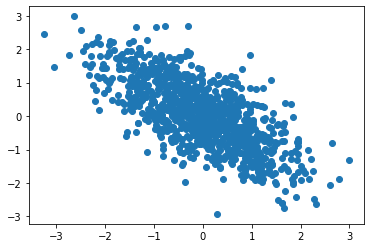

<Figure size 720x576 with 0 Axes>

In [266]:
# Plotting scatter plot to observe distribution

plt.scatter(X[0], X[1])
plt.figure(figsize=(10, 8))
plt.show()

In [227]:
# Converting the array into matrix

X = np.asmatrix(X)
X

matrix([[-0.80270267,  0.14826696, -0.73008652, ..., -0.38844022,
         -0.04152344,  1.95023934],
        [ 1.51626395,  1.03244736, -0.45484151, ...,  1.26987396,
          0.45179885, -0.77529334]])

### First Eigenvector

In [228]:
# Initialising the elements of eigenvector

rand_sample = normal(loc=0, scale=1, size=2)
print(rand_sample)
rand_sample = np.asmatrix(rand_sample)
print(rand_sample)

[ 2.80314033 -1.07379961]
[[ 2.80314033 -1.07379961]]


In [231]:
# Normalizing the eigenvector

norm = np.linalg.norm(rand_sample)
eigen_vec = rand_sample/norm
print("Normalized eigenvetorm :", eigen_vec)
print(eigen_vec.shape)
eigen_vec.shape = (2,1)
print(eigen_vec.shape)
print("L2 norm of eigenvector :",LA.norm(eigen_vec))

Normalized eigenvetorm : [[ 0.93382821 -0.35772179]]
(1, 2)
(2, 1)
L2 norm of eigenvector : 1.0


In [232]:
# Transpose of eigenvector

eigen_vec_trans = np.transpose(eigen_vec)
eigen_vec_trans

matrix([[ 0.93382821, -0.35772179]])

In [234]:
# Projection of data samples onto eigenvector

Z = np.matmul(eigen_vec_trans, X)

In [235]:
print(X.shape)
print(np.transpose(X).shape)
print(eigen_vec.shape)

(2, 1000)
(1000, 2)
(2, 1)


We have the eigenvalue : $\: \: \lambda^{(1)} = (w^{(1)})^{T}\: X\: X^{T}\: w^{(1)}$

We need to maximize this value to get the largest eigen value.

$\frac{\partial \lambda^{(1)}}{\partial w^{(1)}} = \frac{\partial (w^{(1)})^{T}\: X\: X^{T}\: w^{(1)}}{\partial w^{(1)}} = X X^{T} w^{(1)} + X X^{T} w^{(1)} $

$\frac{\partial \lambda^{(1)}}{\partial w^{(1)}} = 2\left ( X X^{T} w^{(1)} \right )$

Uisng Gradient Ascent to update the parameter :

$w^{(1)} = w^{(1)} + \alpha \: \frac{\partial \lambda^{(1)}}{\partial w^{(1)}}$

$w^{(1)} = w^{(1)} + \alpha \: \: 2\left ( X X^{T} w^{(1)} \right )$

In [236]:
alpha = 0.01
w_updated = eigen_vec
X_mat = np.dot(X,np.transpose(X))
X_mat

matrix([[ 972.22077592, -684.09407217],
        [-684.09407217,  976.7602097 ]])

In [237]:
# Parameter updation

for i in range(500):
  lambda_der = 2*np.dot(X_mat, w_updated)
  change = alpha*lambda_der
  w_updated += change
  # Normalizing the eigenvector
  norm = np.linalg.norm(w_updated)
  w_updated = w_updated/norm

print("Updated eigenvector :", w_updated)

Updated eigenvector : [[ 0.70593278]
 [-0.70827884]]


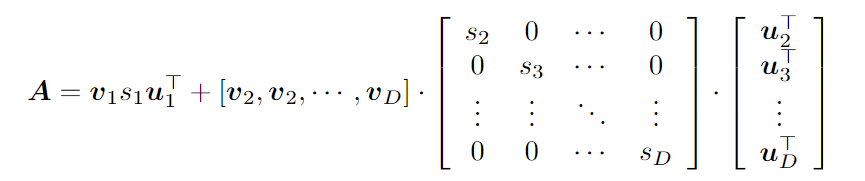

$X = v_{1} s_{1}{u_{1}}^{T} + v_{2}\, s_{2}\, {u_{2}}^{T}$

$s_{d} = ||{v_{d}}^{T} A ||$

$v_{d} = A^{T}\: {v_{d}}/{s_{d}}$

### Eigen value 1

In [240]:
s1 = np.dot(np.transpose(w_updated), X)
s = LA.norm(s1)

u1 = w_updated/s
u = np.dot(np.transpose(X), u1)

eigen_value1 = np.dot(w_updated, np.dot(s, np.transpose(u)))
print(eigen_value1.shape)
print("First Eigen value ", eigen_value1,2)

(2, 1000)
First Eigen value  [[-1.15814752 -0.44233332 -0.13641261 ... -0.82850921 -0.24659102
   1.35952893]
 [ 1.16199645  0.44380334  0.13686595 ...  0.83126263  0.24741053
  -1.36404712]] 2


In [241]:
eigen_value2 = X - eigen_value1
print(eigen_value2.shape)
print("Second Eigen value ",eigen_value2)

(2, 1000)
Second Eigen value  [[ 0.35544485  0.59060028 -0.59367391 ...  0.44006899  0.20506758
   0.59071041]
 [ 0.3542675   0.58864401 -0.59170746 ...  0.43861133  0.20438832
   0.58875378]]


### Second Eigenvector

X2 : [[ 0.35544485  0.59060028 -0.59367391 ...  0.44006899  0.20506758
   0.59071041]
 [ 0.3542675   0.58864401 -0.59170746 ...  0.43861133  0.20438832
   0.58875378]]


<Figure size 720x576 with 0 Axes>

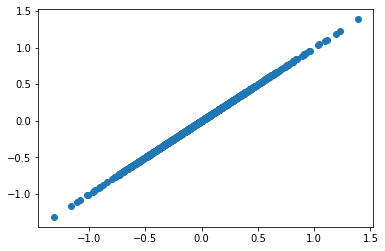

<Figure size 720x576 with 0 Axes>

In [267]:
# Creating the new X matrix and plotting it
X2 = np.squeeze(np.asarray(eigen_value2))
print("X2 :", X2)

plt.scatter(X2[0], X2[1])
plt.figure(figsize=(10, 8))
plt.show()

In [243]:
# Initialising the elements of eigenvector

rand_sample2 = normal(loc=0, scale=1, size=2)
print(rand_sample2)
rand_sample2 = np.asmatrix(rand_sample2)
print(rand_sample2)

[-0.69660534 -1.56547659]
[[-0.69660534 -1.56547659]]


In [244]:
# Normalizing the eigenvector

norm2 = np.linalg.norm(rand_sample2)
eigen_vec2 = rand_sample2/norm2
print("Normalized eigenvetor :", eigen_vec2)
print(eigen_vec2.shape)
eigen_vec2.shape = (2,1)
print(eigen_vec2.shape)
print("L2 norm of eigenvector :",LA.norm(eigen_vec2))

Normalized eigenvetor : [[-0.40654681 -0.91362996]]
(1, 2)
(2, 1)
L2 norm of eigenvector : 1.0


In [245]:
# Transpose of eigenvector

eigen_vec_trans2 = np.transpose(eigen_vec2)
eigen_vec_trans2

matrix([[-0.40654681, -0.91362996]])

In [246]:
alpha = 0.01
w_updated2 = eigen_vec2

X_mat2 = np.dot(eigen_value2,np.transpose(eigen_value2))
X_mat2

matrix([[145.67806369, 145.19552852],
        [145.19552852, 144.71459168]])

In [247]:
# Parameter updation

for i in range(500):
  lambda_der2 = 2*np.dot(X_mat2, w_updated2)
  change2 = alpha*lambda_der2
  w_updated2 += change2
  # Normalizing the eigenvector
  norm2 = np.linalg.norm(w_updated2)
  w_updated2 = w_updated2/norm2

print("Updated eigenvector :", w_updated2)

Updated eigenvector : [[-0.70827884]
 [-0.70593278]]


In [248]:
w_updated = np.squeeze(np.asarray(w_updated))
print("First updated Eigenvector :", w_updated)

w_updated2 = np.squeeze(np.asarray(w_updated2))
print("Second updated Eigenvector :", w_updated2)

First updated Eigenvector : [ 0.70593278 -0.70827884]
Second updated Eigenvector : [-0.70827884 -0.70593278]


<Figure size 720x576 with 0 Axes>

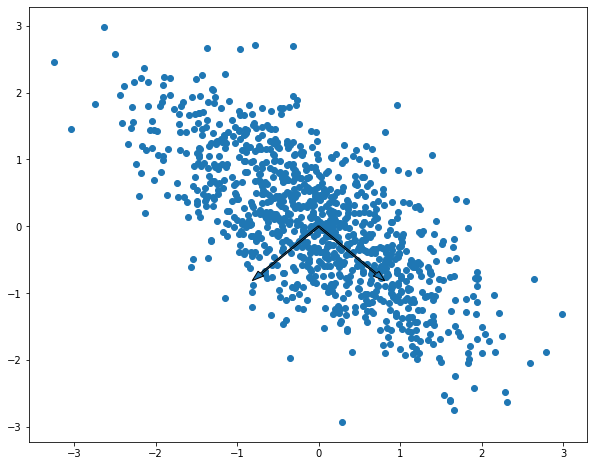

In [264]:
# Plotting the distribution with eigen vectors

X = mat['X']
plt.figure(figsize=(10, 8))
plt.scatter(X[0], X[1])
plt.arrow(0,0, w_updated[0], w_updated[1], head_width = 0.1, width = 0.02)
plt.arrow(0,0, w_updated2[0], w_updated2[1], head_width = 0.1, width = 0.02)